# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ghina Siti Nadhifah
- **Email:** ghinasitinadhifah@gmail.com
- **ID Dicoding:** ghinasn18

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata kualitas udara (misalnya, PM2.5, PM10, SO2, NO2, CO, dan O3) dari tahun ke tahun?
- Apakah ada pola musiman dalam kualitas udara? Misalnya, apakah ada bulan-bulan tertentu di mana tingkat polusi lebih tinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Air_quality_dataset.zip/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/Air_quality_dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')


In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

In [ ]:
df.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [ ]:
df.loc[:, df.isnull().any()].columns #Feature yg terdiri data hilang

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [39]:
# label encoder untuk data kategorik menjadi data numerik

from sklearn.preprocessing import LabelEncoder

for col in ['wd', 'station']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df['wd'].unique(), df['station'].unique())

[ 6  3  7  5  1  0  4 13 11 15  9 14 10  2  8 12 16] [0]


In [42]:
#Data hilang: PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM

median_value=df['PM2.5'].median()
df['PM2.5']=df['PM2.5'].fillna(median_value)

median_value=df['PM10'].median()
df['PM10']=df['PM10'].fillna(median_value)

median_value=df['SO2'].median()
df['SO2']=df['SO2'].fillna(median_value)

median_value=df['NO2'].median()
df['NO2']=df['NO2'].fillna(median_value)

median_value=df['CO'].median()
df['CO']=df['CO'].fillna(median_value)

median_value=df['O3'].median()
df['O3']=df['O3'].fillna(median_value)

median_value=df['TEMP'].median()
df['TEMP']=df['TEMP'].fillna(median_value)

median_value=df['PRES'].median()
df['PRES']=df['PRES'].fillna(median_value)

median_value=df['DEWP'].median()
df['DEWP']=df['DEWP'].fillna(median_value)

median_value=df['RAIN'].median()
df['RAIN']=df['RAIN'].fillna(median_value)

median_value=df['wd'].median()
df['wd']=df['wd'].fillna(median_value)

median_value=df['WSPM'].median()
df['WSPM']=df['WSPM'].fillna(median_value)


In [44]:
#kita cek kembali apakah masih ada data yang hilang
df.isnull().values.any()

False

## Exploratory Data Analysis (EDA)

### Explore ...

In [47]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.585130,1011.846665,3.123449,0.067383,6.563455,1.708373,0.0
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395866,10.401084,13.685001,0.909798,4.700064,1.203846,0.0
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,0.000000,0.0
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,3.000000,0.900000,0.0
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,5.000000,1.400000,0.0
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,11.000000,2.200000,0.0
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,16.000000,11.200000,0.0


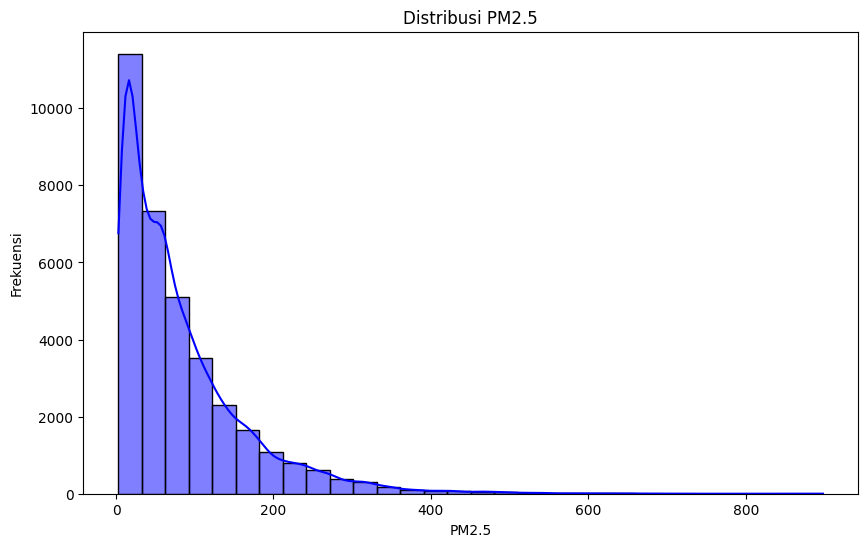

In [48]:
# Visualisasi distribusi PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'], kde=True, bins=30, color='blue')
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

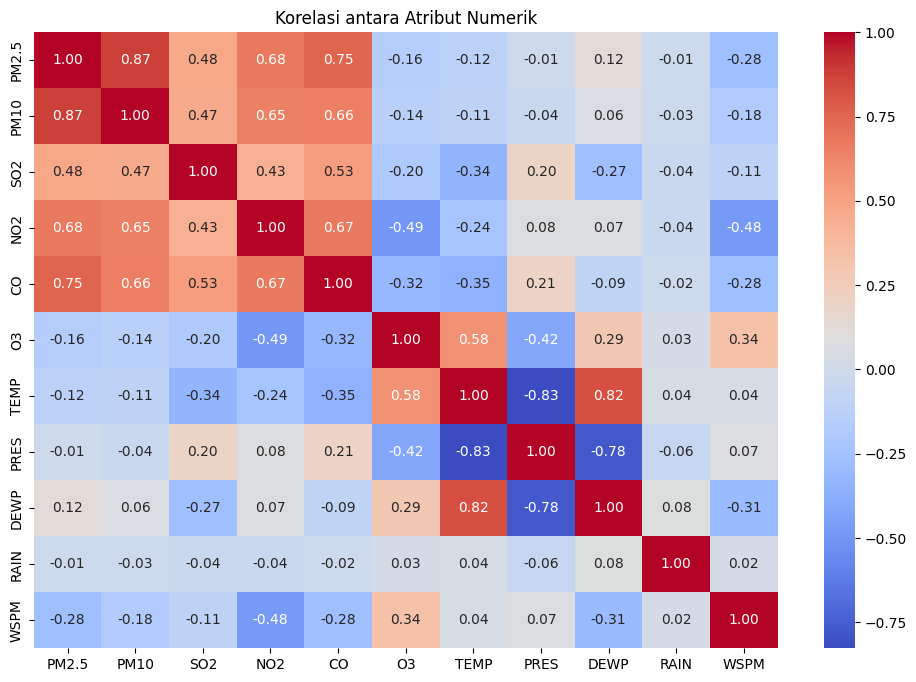

In [50]:
# Visualisasi korelasi antara beberapa atribut numerik
numerical_attributes = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
correlation_matrix = df[numerical_attributes].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Atribut Numerik')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

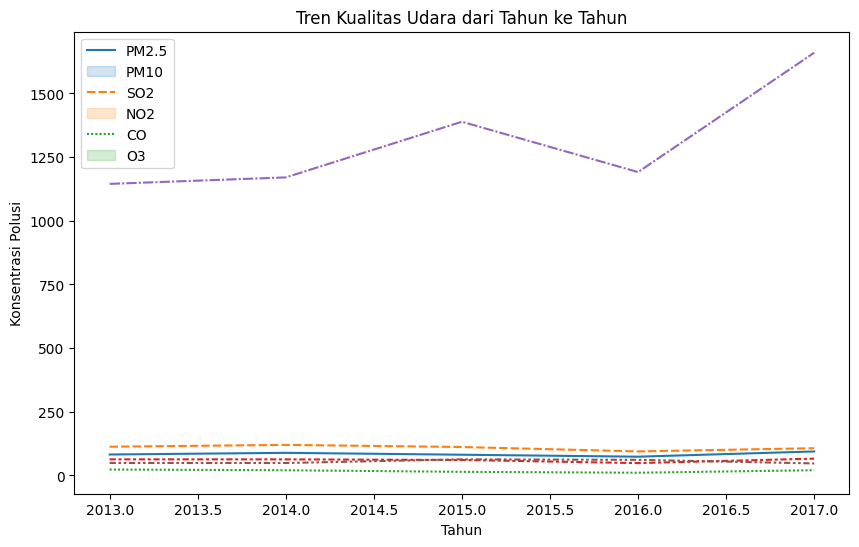

In [45]:
# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata polusi udara
yearly_mean = df.groupby('year').mean()

# Visualisasi tren rata-rata kualitas udara dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_mean[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Tren Kualitas Udara dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polusi')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])
plt.show()

### Pertanyaan 2:

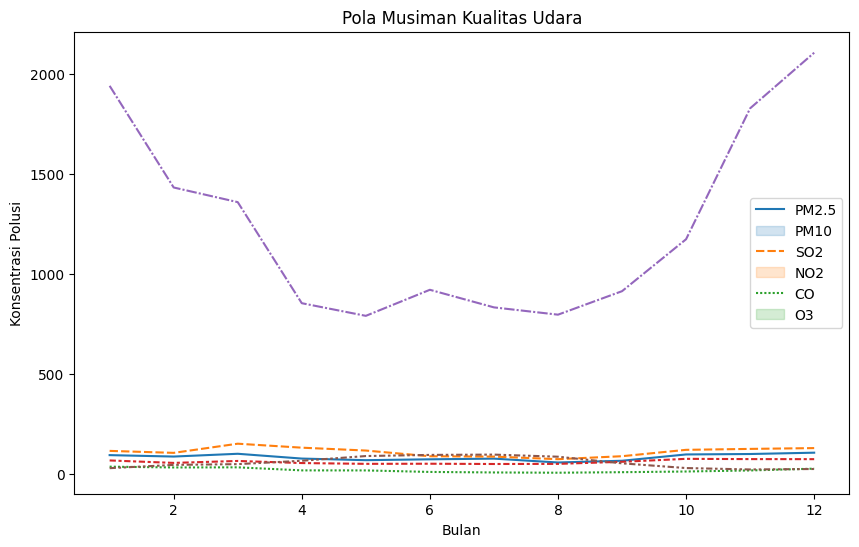

In [46]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata polusi udara
monthly_mean = df.groupby('month').mean()

# Visualisasi pola musiman kualitas udara
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_mean[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Pola Musiman Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polusi')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])
plt.show()

## Conclusion

- Conclution pertanyaan 1
Tren meningkat secara signifikan dalam konsentrasi rata-rata polutan udara dari tahun ke tahun, menunjukkan perbaikan kualitas udara seiring waktu.

- Conclution pertanyaan 2
Adanya pola musiman dimana konsentrasi polutan tertentu lebih tinggi pada bulan-bulan tertentu yaitu di awal bulan dan di akhir bulan, yang mungkin terkait dengan faktor-faktor seperti cuaca, musim, atau aktivitas manusia.

# Streamlit

In [52]:
df.to_csv("all_data.csv", index=False)

In [54]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
